In [1]:
'''solutie realizata de Sasha Kuvshynova si Mircea Marin in cadrul lab PP si acceptata de profesor'''
import numpy as np
import pymc as pm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytensor.tensor as pt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# Selecting the images: 5 ones and 5 sevens
train_images = np.load("train_images.npy")
train_images = pd.DataFrame(train_images)
select_indices = [3, 18, 995, 997, 998, 7, 12, 13, 22, 42]
train_images_17 = train_images[train_images.index.isin(select_indices)]

# Binarization
train_images = pd.DataFrame(train_images_17)
train_images = train_images.applymap(lambda x: 1 if x > 80 else 0)
# plt.imshow(np.reshape(train_images.iloc[4], (28,28)))

In [4]:
# Multiple random variables, see Lecture 3
coords = {'pixels1':["o"+str(i) for i in range(784)], 'pixels7':["s"+str(i) for i in range(784)]}
print(coords)

# Unsupervised clustering, see Lecture 4
with pm.Model(coords=coords) as model:
    p1 = pm.Uniform('p', 0, 1)
    p2 = 1 - p1
    p = pt.stack([p1, p2])
    assignment = pm.Categorical("assignment", p, 
                                shape=train_images.shape[0],
                                initval=np.random.randint(0, 2, train_images.shape[0]))
with model:
    bp_1 = pm.Uniform("bp_1", 0, 1, dims="pixels1")
    bp_7 = pm.Uniform("bp_7", 0, 1, dims="pixels7")
    bp = pt.stack([bp_1, bp_7])
    bp_i = pm.Deterministic("bp_i", bp[assignment])
    obs = pm.Bernoulli("obs",p=bp_i, observed = train_images)


{'pixels1': ['o0', 'o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10', 'o11', 'o12', 'o13', 'o14', 'o15', 'o16', 'o17', 'o18', 'o19', 'o20', 'o21', 'o22', 'o23', 'o24', 'o25', 'o26', 'o27', 'o28', 'o29', 'o30', 'o31', 'o32', 'o33', 'o34', 'o35', 'o36', 'o37', 'o38', 'o39', 'o40', 'o41', 'o42', 'o43', 'o44', 'o45', 'o46', 'o47', 'o48', 'o49', 'o50', 'o51', 'o52', 'o53', 'o54', 'o55', 'o56', 'o57', 'o58', 'o59', 'o60', 'o61', 'o62', 'o63', 'o64', 'o65', 'o66', 'o67', 'o68', 'o69', 'o70', 'o71', 'o72', 'o73', 'o74', 'o75', 'o76', 'o77', 'o78', 'o79', 'o80', 'o81', 'o82', 'o83', 'o84', 'o85', 'o86', 'o87', 'o88', 'o89', 'o90', 'o91', 'o92', 'o93', 'o94', 'o95', 'o96', 'o97', 'o98', 'o99', 'o100', 'o101', 'o102', 'o103', 'o104', 'o105', 'o106', 'o107', 'o108', 'o109', 'o110', 'o111', 'o112', 'o113', 'o114', 'o115', 'o116', 'o117', 'o118', 'o119', 'o120', 'o121', 'o122', 'o123', 'o124', 'o125', 'o126', 'o127', 'o128', 'o129', 'o130', 'o131', 'o132', 'o133', 'o134', 'o135', 'o136', '

In [ ]:

# Sampling. Caution: Takes 13 hours to run.
with model:
    step_1 = pm.Metropolis(vars=[p1, bp_1, bp_7])
    step_2 = pm.CategoricalGibbsMetropolis(vars=[assignment])
    trace1 = pm.sample(40000, step=[step_1, step_2], return_inferencedata=False, tune=5000, chains=1)



Clusters found:

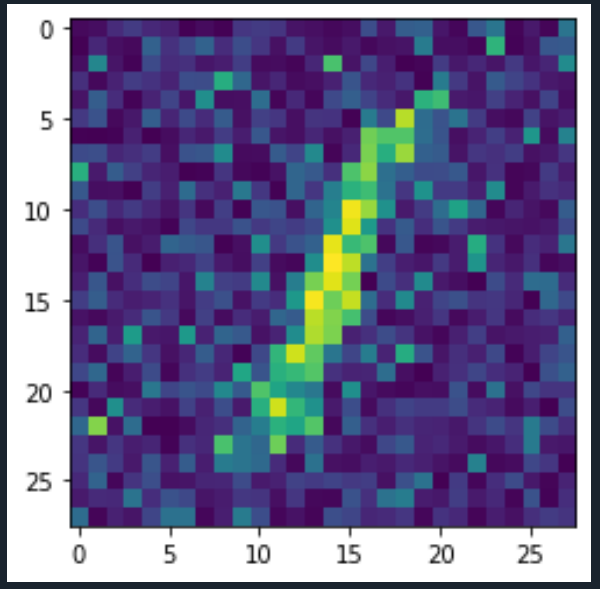 
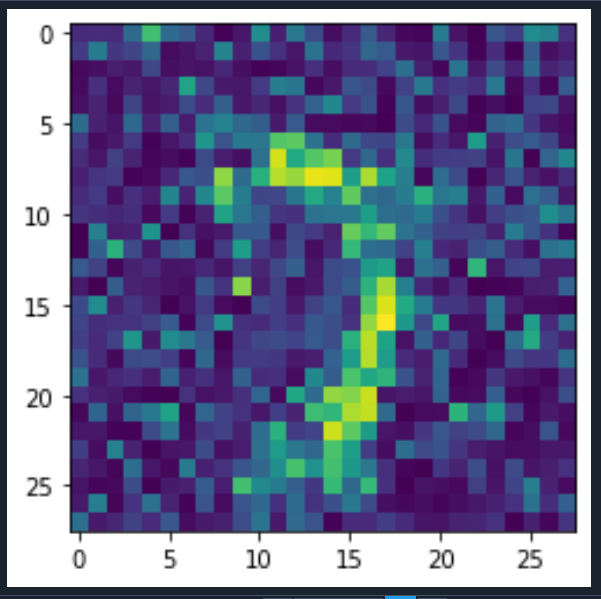

In [ ]:
# Results
def print_pred_image(vect):
    plt.imshow(np.reshape(vect, (28, 28)))

print_pred_image(trace1["bp_1"][3])

plt.show()
print_pred_image(trace1["bp_7"][3])

In [ ]:
# Saving trace results to csv
rez = pd.DataFrame(trace1["bp_1"])
rez.to_csv("rezbp1.csv")

rez = pd.DataFrame(trace1["bp_7"])
rez.to_csv("rezbp7.csv")

Using more images of more easily distinguishable numbers (e.g. 0 and 4) yields better results.

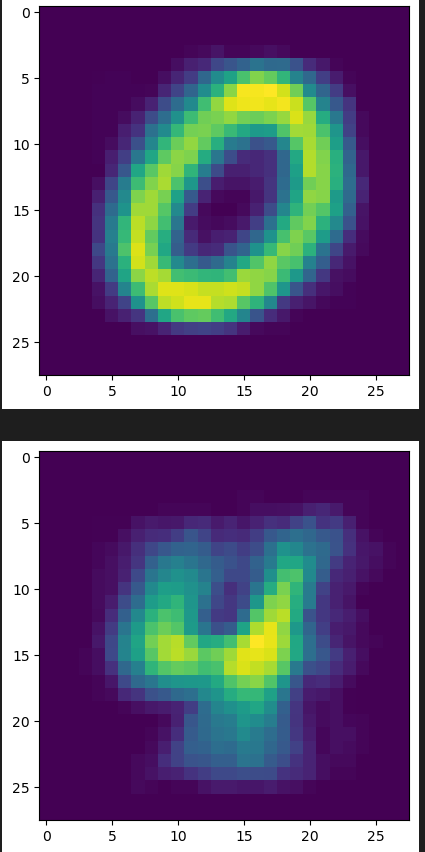

In [5]:
train_images = np.load("train_images.npy")
train_labels = np.load("train_labels.npy")

df = pd.DataFrame(train_labels, columns=["Cifra"])

train_images = pd.DataFrame(train_images)

select_indices0 = [15, 28, 29, 33, 52, 79, 86, 87, 98, 113, 122, 124, 141, 148, 173, 176, 186, 226, 230, 232, 237, 244, 247, 255, 258, 265, 279, 283, 287, 289, 296, 315, 320, 322, 332, 333, 335, 367, 378, 383, 388, 397, 400, 411, 446,
                   461, 466, 479, 482, 493, 498, 509, 517, 531, 544, 552, 567, 569, 573, 611, 640, 643, 645, 660, 677, 684, 689, 715, 728, 732, 760, 789, 800, 806, 825, 828, 835, 839, 875, 880, 881, 882, 899, 915, 919, 932, 943, 963, 972, 974, 981]

select_indices4 = [0, 5, 8, 20, 21, 27, 31, 89, 96, 103, 109, 111, 127, 144, 153, 155, 160, 172, 177, 181, 184, 193, 202, 211, 214, 240, 245, 267, 308, 312, 339, 348, 352, 356, 359, 391, 393, 423, 430, 436, 455, 457, 480, 484, 496,
                   504, 505, 512, 516, 521, 525, 526, 527, 538, 540, 546, 561, 562, 572, 583, 586, 606, 617, 628, 630, 635, 642, 650, 669, 676, 678, 682, 687, 705, 707, 740, 744, 745, 758, 767, 785, 791, 792, 823, 841, 849, 865, 870, 873, 876, 884]

select_indices = select_indices0+select_indices4
train_images_04 = train_images[train_images.index.isin(select_indices)]

train_images = pd.DataFrame(train_images_04)

train_images = train_images.applymap(lambda x: 1 if x > 80 else 0)


In [ ]:

with pm.Model(coords=coords) as model:
    p1 = pm.Uniform('p', 0, 1)
    p2 = 1 - p1
    p = pt.stack([p1, p2])
    assignment = pm.Categorical("assignment", p,
                                shape=train_images.shape[0],
                                initval=np.random.randint(0, 2, train_images.shape[0]))

with model:
    bp_0 = pm.Uniform("bp_0", 0, 1, dims="pixels0")
    bp_4 = pm.Uniform("bp_4", 0, 1, dims="pixels4")
    bp = pt.stack([bp_0, bp_4])
    bp_i = pm.Deterministic("bp_i", bp[assignment])
    obs = pm.Bernoulli("obs", p=bp_i, observed=train_images)


In [ ]:
# Sampling. Using NUTS instead of Metropolis takes less time, under an hour.
with model:
    step_1 = pm.NUTS(vars=[p1, bp_0, bp_4])
    step_2 = pm.CategoricalGibbsMetropolis(vars=[assignment])
    trace1 = pm.sample(500, step=[step_1, step_2],
                       return_inferencedata=False, tune=500, chains=1)

In [ ]:
# Results
print_pred_image(np.mean(trace1["bp_0"], axis=0))

print_pred_image(np.mean(trace1["bp_4"], axis=0))